# Binary Alpha Digits Study
## Get the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from principal_RBM_alpha import RBM
from principal_DBN_alpha import DBN
from download_data import alpha_digit
from utils import show_alpha_digits

## Get the data

In [2]:
LIST_IDX_DATA = [5, 12, 21]
data = alpha_digit(LIST_IDX_DATA)

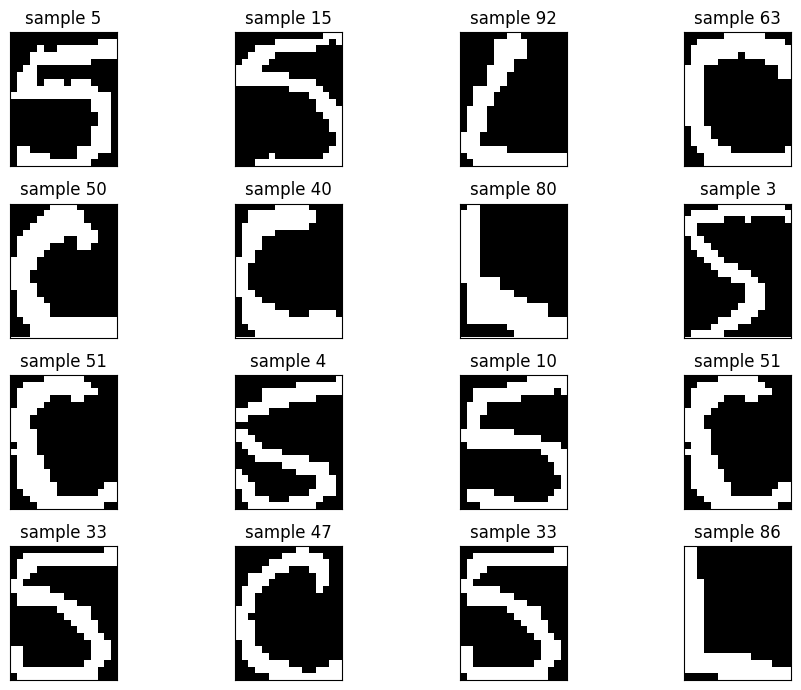

In [3]:
show_alpha_digits(data, 4, 4)

## RBM

### Create and Train the model

After loading the data, we specify the parameters related to the network and to learning: size of the neural network (vector containing the number of neurons), number of iterations, learning rate and size of the mini-batch.


In [4]:
p = 320 #number of visible neurones
q = 150 #number of hidden neurones
EPSILON = 0.01 #learning rate
BATCH_SIZE = 32 #size of the mini-batch
NB_EPOCHS = 300 #number of iterations for gradient descents

First, an RBM is trained unsupervised and then it is checked that the trained RBM is able to generate data with a structure similar to the training data.

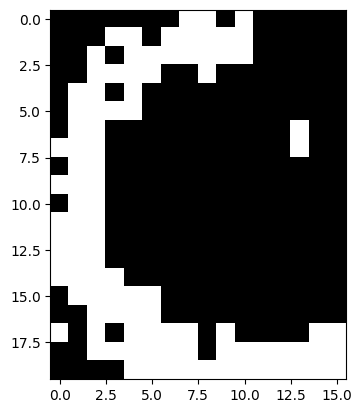

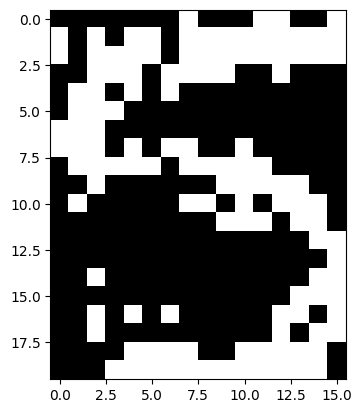

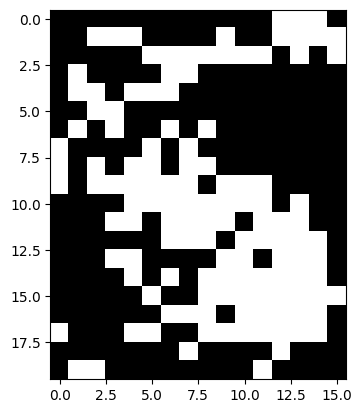

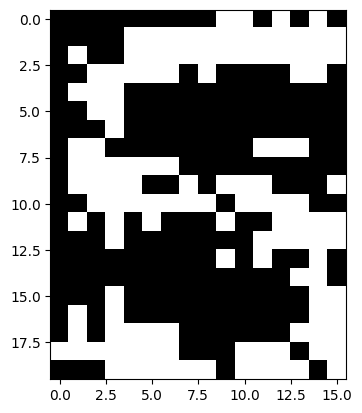

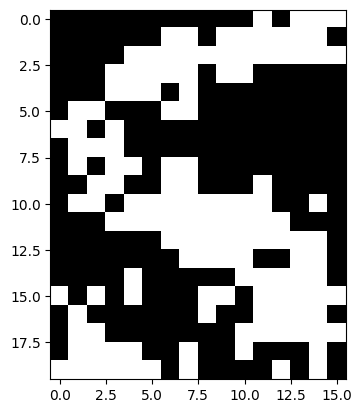

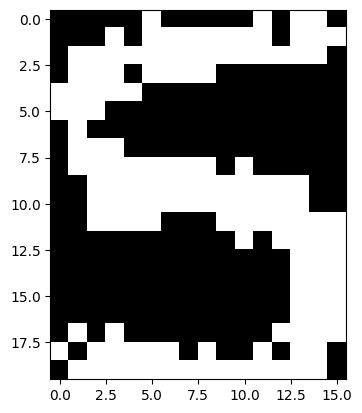

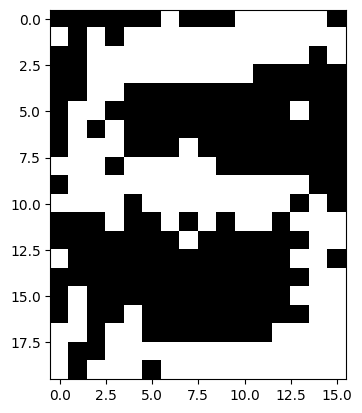

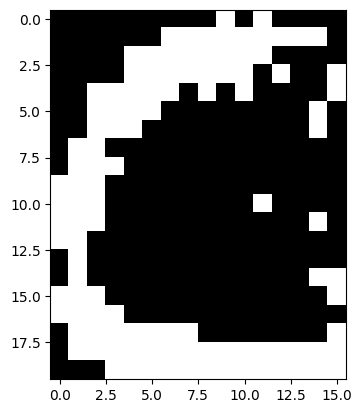

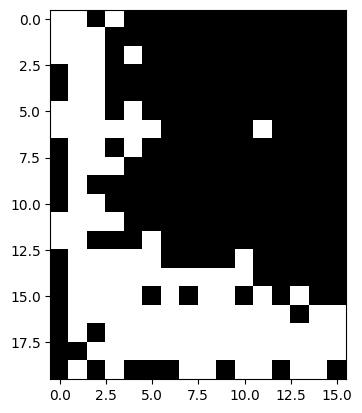

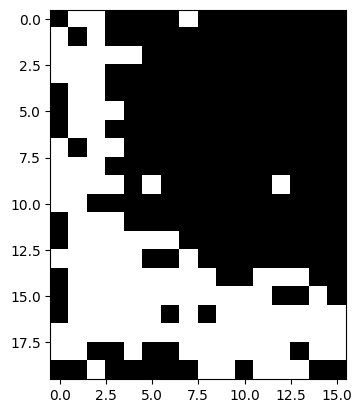

In [5]:
# Create the model
rbm_model = RBM(p=p, q=q)

# Train the model
rbm_model.train_RBM(X=data, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS)

# Generate only images from RBM
rbm_model.generer_image_RBM(nb_data=10, nb_gibbs=100)

### Verification of generated images 

Epoch0/300


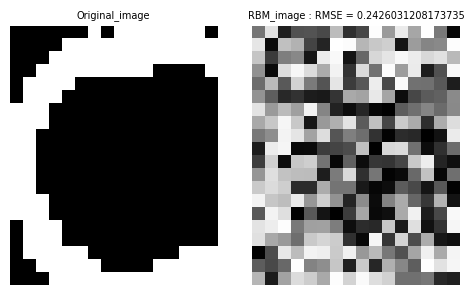

Epoch20/300


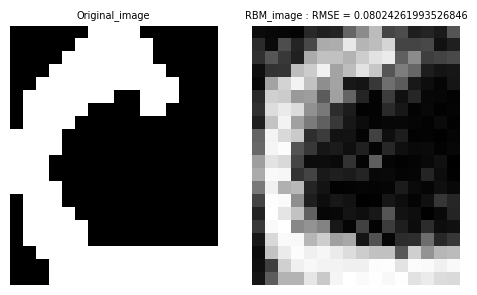

Epoch40/300


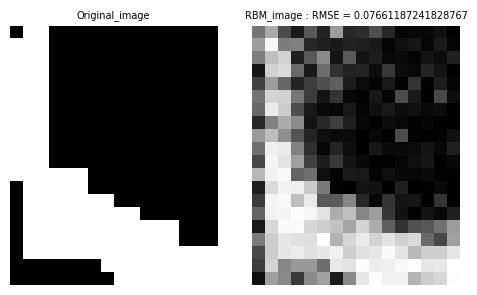

Epoch60/300


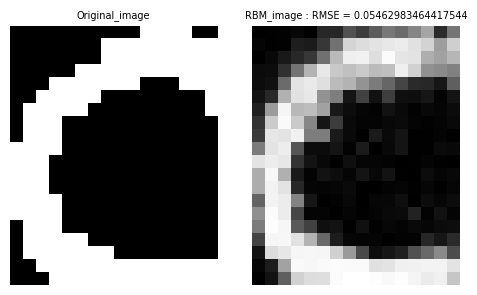

Epoch80/300


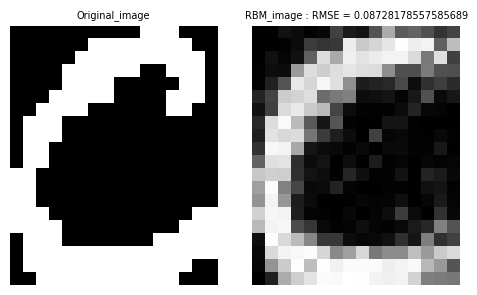

Epoch100/300


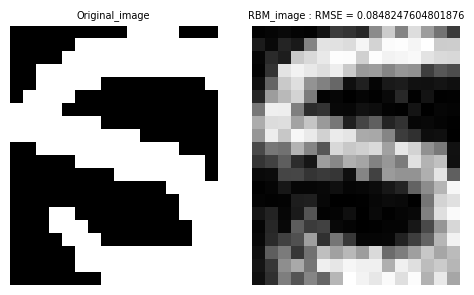

Epoch120/300


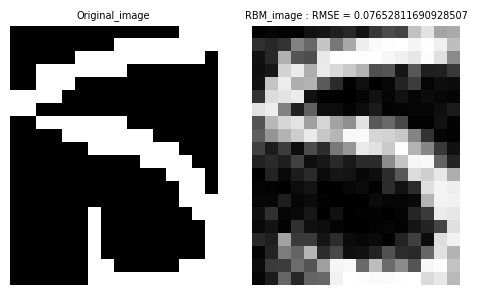

Epoch140/300


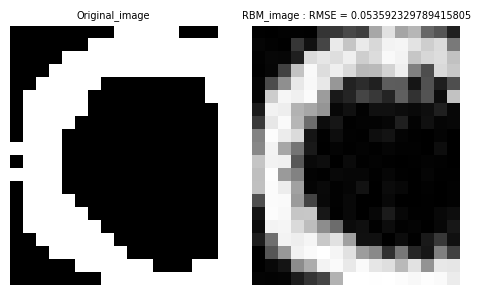

Epoch160/300


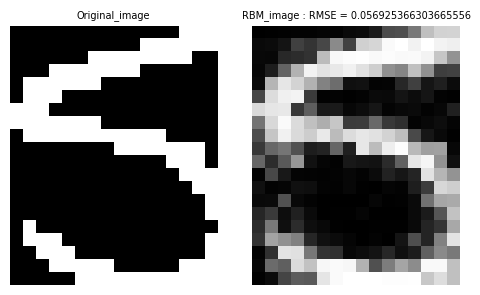

Epoch180/300


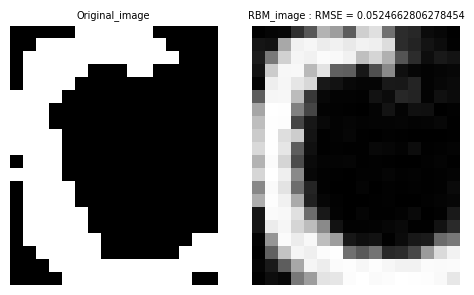

Epoch200/300


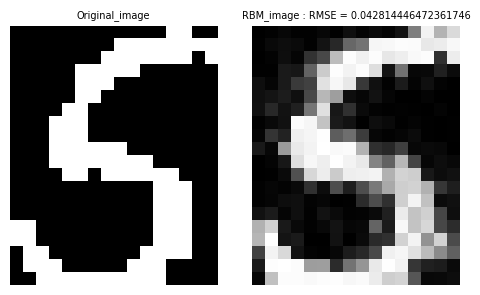

Epoch220/300


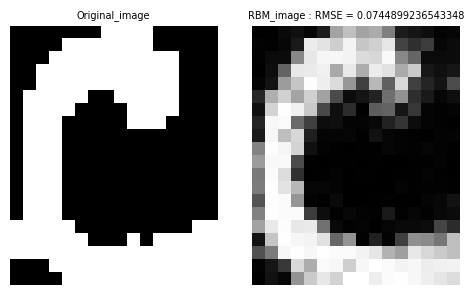

Epoch240/300


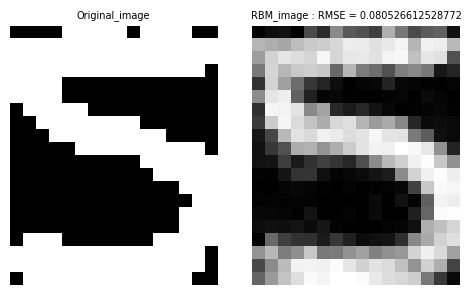

Epoch260/300


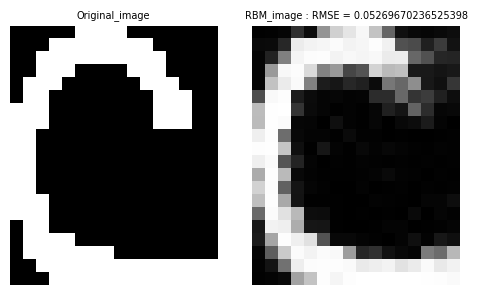

Epoch280/300


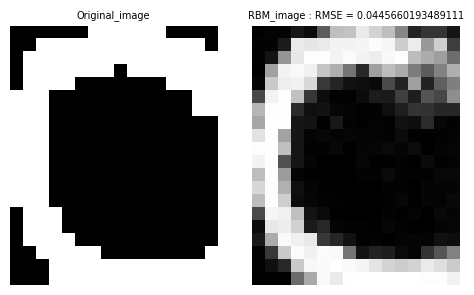

In [6]:
rbm_model.display_image_RBM_vs_original()

### Weights matrix W 

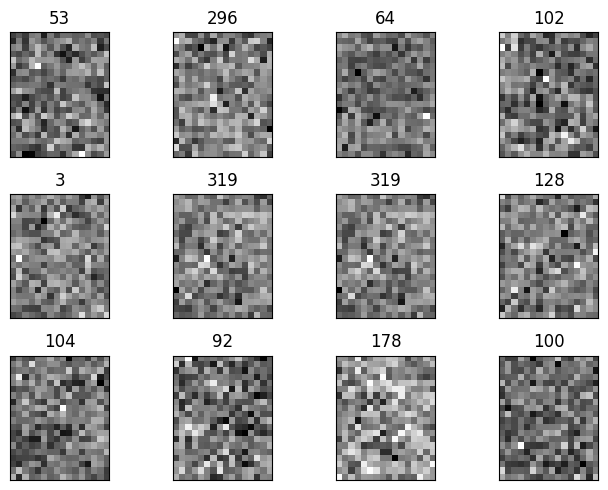

In [7]:
rbm_model = RBM(p, q=512)
rbm_model.train_RBM(X=data, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS)
rbm_model.features_extracted(3, 4)

### Analysis of the model

#### Study the RMSE as the epoch increases

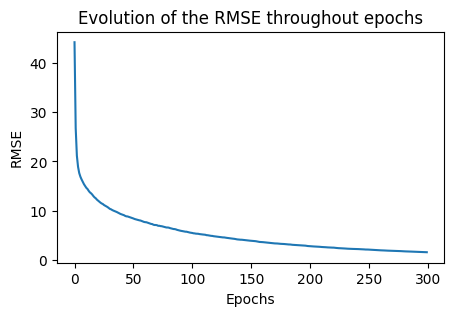

In [8]:
rbm = RBM(p, q=512)
errors_all = rbm.train_RBM(X=data, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS)
plt.figure(figsize=(5, 3))
plt.plot(errors_all)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Evolution of the RMSE throughout epochs')
plt.show()

#### Learning rate / epsilon

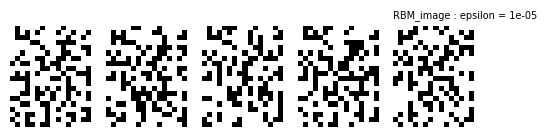

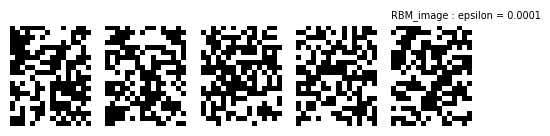

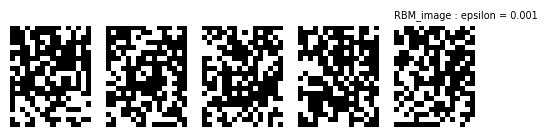

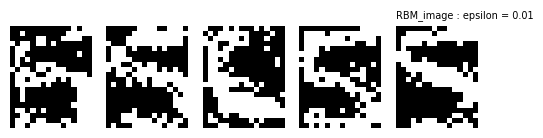

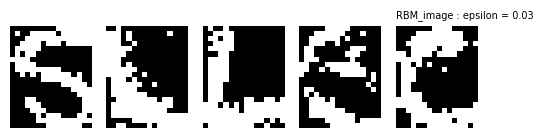

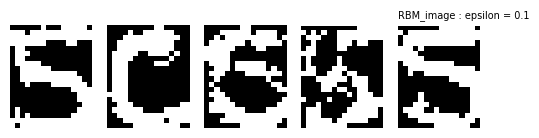

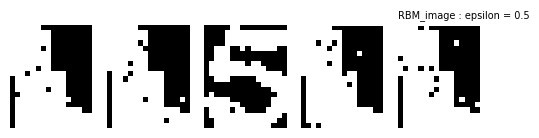

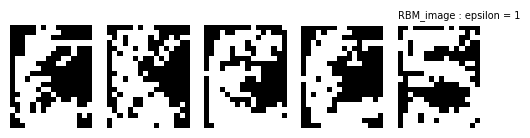

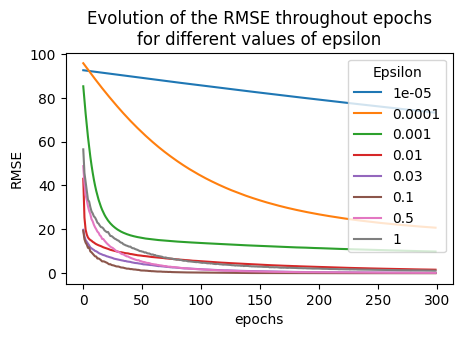

In [9]:
# Test different values of learning rate / epsilon:
# each subplot correspond to a value of epsilon
epsilons = [0.00001, 0.0001, 0.001, 0.01, 0.03, 0.1, 0.5, 1]
errors_eps = []
for eps in epsilons:
    rbm = RBM(p, q=512)
    errors_all_eps = rbm.train_RBM(X=data, epsilon=eps, batch_size=BATCH_SIZE, nb_epochs=300)
    errors_eps.append(errors_all_eps)
    rbm.generate_for_analysis(nb_gibbs=10, col=5, row=1, param_analysed='epsilon')

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, eps in enumerate(errors_eps):
    plt.plot(eps, label=epsilons[i])
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.legend(title='Epsilon')
plt.title('Evolution of the RMSE throughout epochs\nfor different values of epsilon')
plt.show()

#### Batch_size

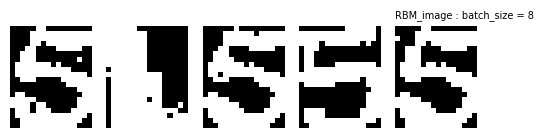

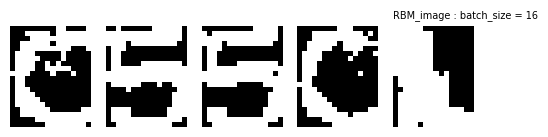

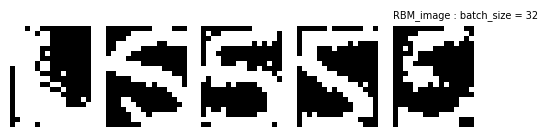

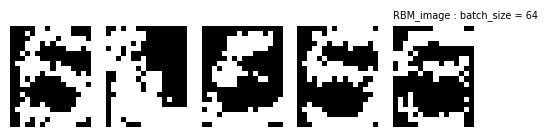

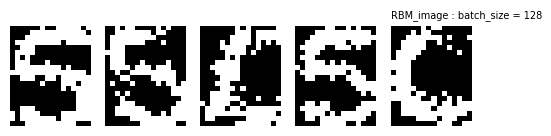

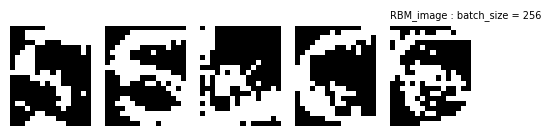

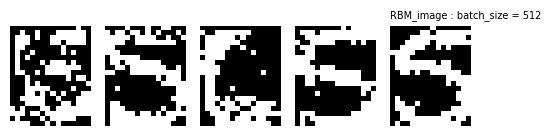

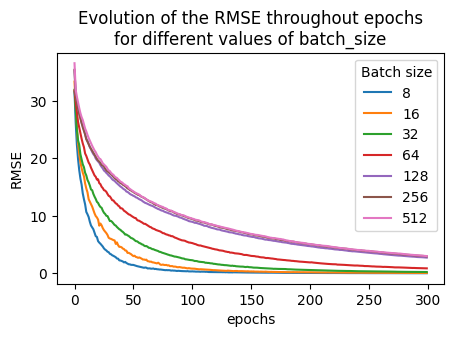

In [10]:
# Test different values of batch_size

batch_size = [8, 16, 32, 64, 128, 256, 512]
errors_batchsize = []
for bs in batch_size:
    rbm = RBM(p=320, q=256)
    errors_all_batchsize = rbm.train_RBM(X=data, epsilon=0.1, batch_size=bs, nb_epochs=300)
    errors_batchsize.append(errors_all_batchsize)
    rbm.generate_for_analysis(nb_gibbs=10, col=5, row=1, param_analysed='batch_size')

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, bs in enumerate(errors_batchsize):
    plt.plot(bs, label=batch_size[i])
    
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.title('Evolution of the RMSE throughout epochs\nfor different values of batch_size')
plt.legend(title='Batch size')
plt.show()

As we can see, in our case, the larger the batch size, the slower the convergence.

#### Values of hidden neurones (q)

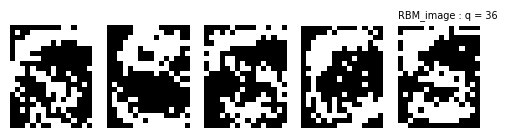

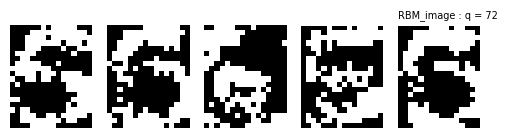

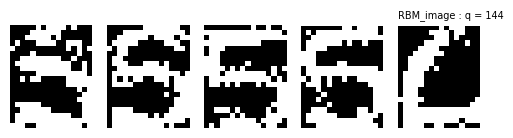

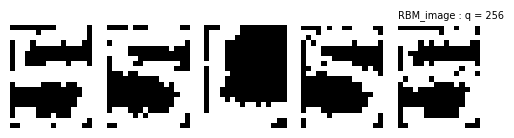

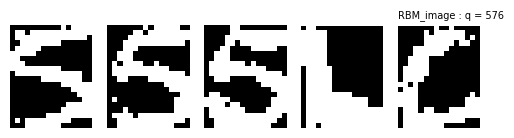

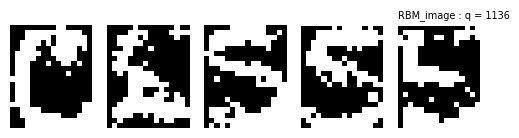

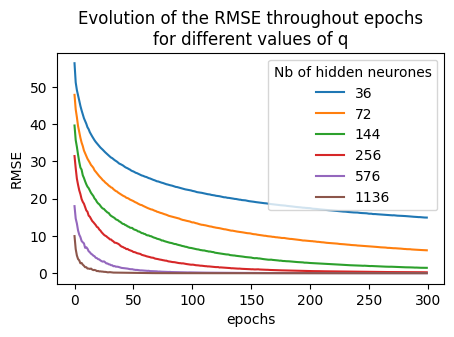

In [11]:
# Test different values of q (hidden neurones capable of capturing or extracting the features)
# each subplot correspond to a value of q

q_values = [36, 72, 144, 256, 576, 1136]
errors_qvalues = []
for qvalue in q_values:
    rbm = RBM(p, q=qvalue)
    errors_all_qvalues = rbm.train_RBM(X=data, epsilon=0.1, batch_size=BATCH_SIZE, nb_epochs=300)
    errors_qvalues.append(errors_all_qvalues)
    rbm.generate_for_analysis(nb_gibbs=10, col=5, row=1, param_analysed='q')

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, qvalue in enumerate(errors_qvalues):
    plt.plot(qvalue, label=q_values[i])
    
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.title('Evolution of the RMSE throughout epochs\nfor different values of q')
plt.legend(title='Nb of hidden neurones')
plt.show()

#### Number of different digits

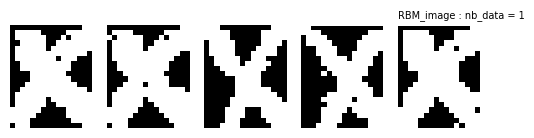

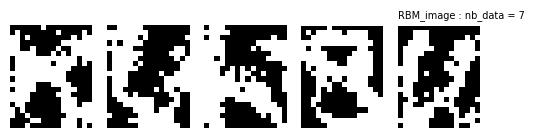

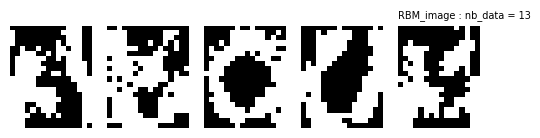

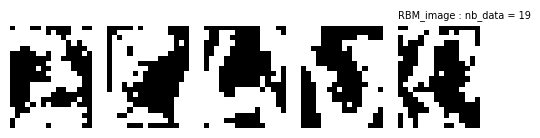

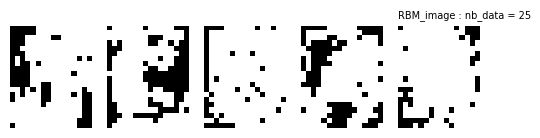

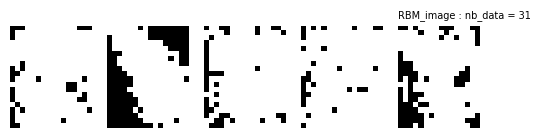

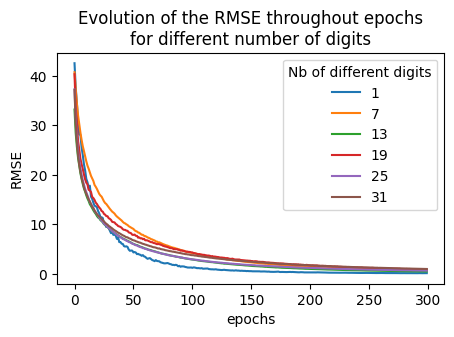

In [12]:
errors_all = []
nb_digits = []
for i in range(1, 36, 6):
    indexes = [
            np.random.randint(0, 36) for _ in range(i)
        ]
    data = alpha_digit(indexes)
    nb_digit = len(indexes)
    nb_digits.append(nb_digit)
    rbm = RBM(p=320, q=256)
    errors_all_nb_data = rbm.train_RBM(X=data, epsilon=0.1, batch_size=BATCH_SIZE, nb_epochs=300)
    errors_all.append(errors_all_nb_data)
    rbm.generate_for_analysis(nb_gibbs=10, col=5, row=1, param_analysed='nb_data', nb_digit=nb_digit)

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, error in enumerate(errors_all):
    plt.plot(error, label=nb_digits[i])
    
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.title('Evolution of the RMSE throughout epochs\nfor different number of digits')
plt.legend(title='Nb of different digits')
plt.show()

As we can expect, it is easier to generate images when you don't have a lot of different digits.

## DBN

In [10]:
LIST_IDX_DATA = [5, 12, 21]
data = alpha_digit(LIST_IDX_DATA)

### Create and Train the model

In [3]:
CONFIG = [320, 200, 100, 150]
EPSILON = 0.01
BATCH_SIZE = 32
NB_EPOCHS = 600

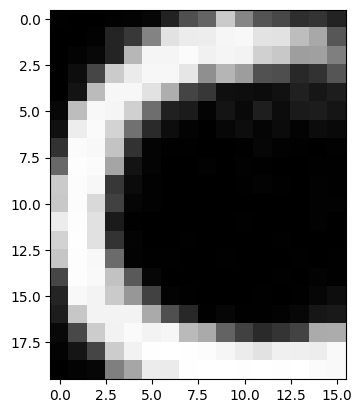

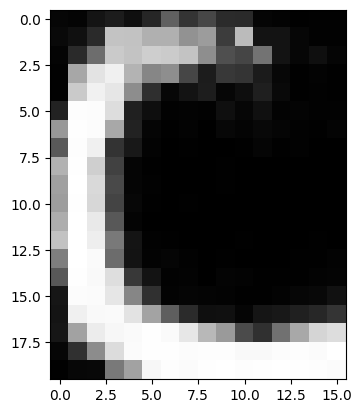

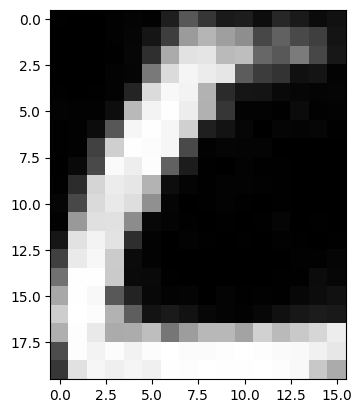

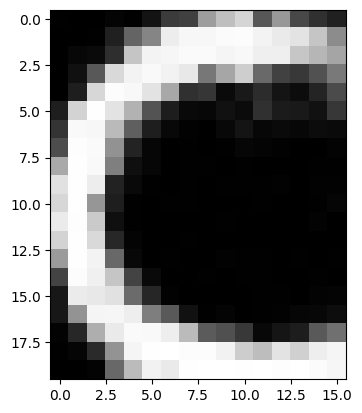

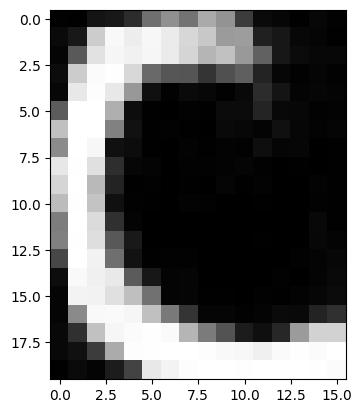

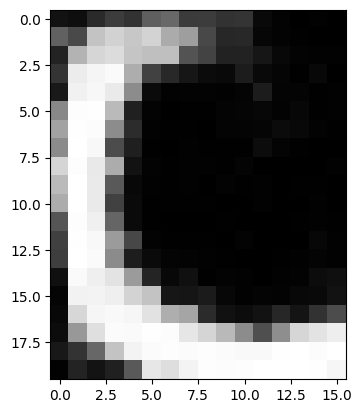

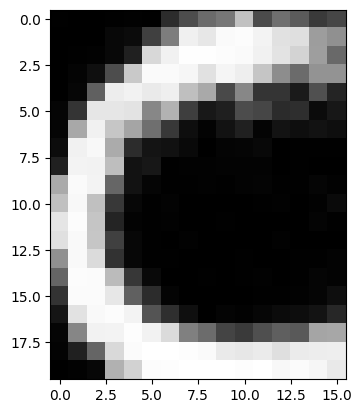

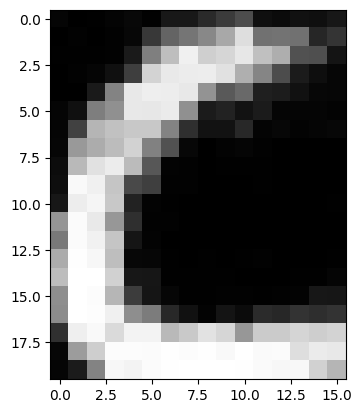

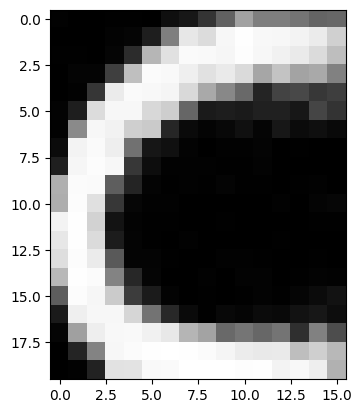

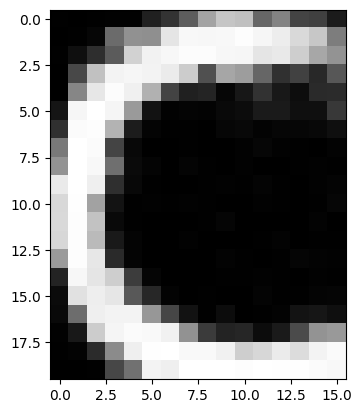

In [4]:
# Create the model
dbn_model = DBN(config=CONFIG)

# Train the model
dbn_model, losses = dbn_model.train_DBN(X=data, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=300)

# Generate images from DBN
dbn_model.generer_image_DBN(nb_data=10, nb_gibbs=100)

### Analysis of the model

#### Study the RMSE as the epoch increases

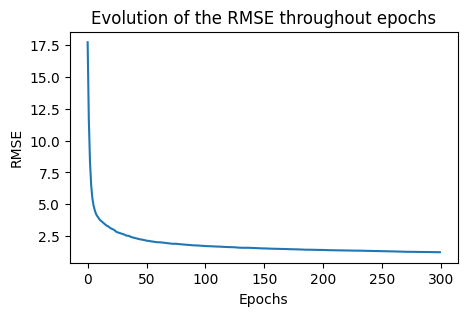

In [5]:
dbn_model = DBN(config=CONFIG)
_, errors_all = dbn_model.train_DBN(X=data, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=300)
plt.figure(figsize=(5, 3))
plt.plot(errors_all[-1])
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Evolution of the RMSE throughout epochs')
plt.show()

#### Learning rate / epsilon

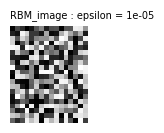

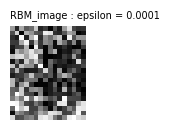

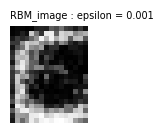

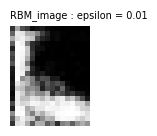

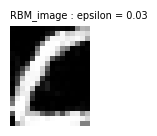

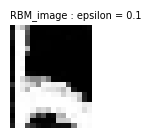

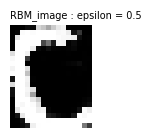

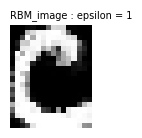

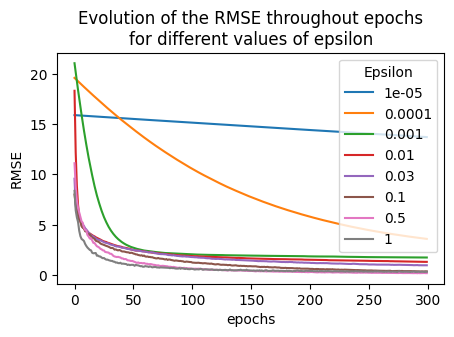

In [6]:
# Test different values of learning rate / epsilon
epsilons = [0.00001, 0.0001, 0.001, 0.01, 0.03, 0.1, 0.5, 1]
errors_eps = []
for eps in epsilons:
    dbn_model = DBN(config=CONFIG)
    dbn_model, errors_all_eps = dbn_model.train_DBN(X=data, epsilon=eps, batch_size=BATCH_SIZE, nb_epochs=300)
    errors_eps.append(errors_all_eps[-1])
    dbn_model.generate_for_analysis_DBN(nb_gibbs=100, col=5, row=1, param_analysed='epsilon')

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, eps in enumerate(errors_eps):
    plt.plot(eps, label=epsilons[i])
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.legend(title='Epsilon')
plt.title('Evolution of the RMSE throughout epochs\nfor different values of epsilon')
plt.show()

#### Batch_size

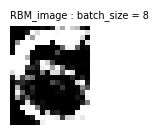

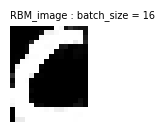

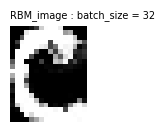

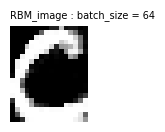

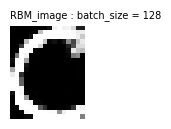

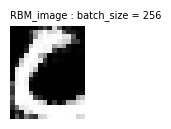

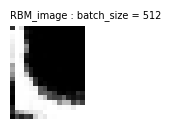

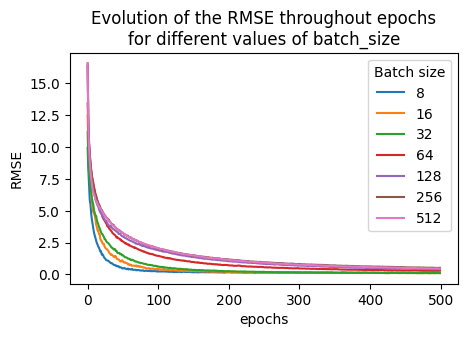

In [7]:
# Test different values of batch_size
batch_size = [8, 16, 32, 64, 128, 256, 512]

errors_batchsize = []
for bs in batch_size:
    dbn_model = DBN(config=CONFIG)
    dbn_model, errors_all_batchsize = dbn_model.train_DBN(X=data, epsilon=0.5, batch_size=bs, nb_epochs=500)
    errors_batchsize.append(errors_all_batchsize[-1])
    dbn_model.generate_for_analysis_DBN(nb_gibbs=100, col=5, row=1, param_analysed='batch_size')

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, bs in enumerate(errors_batchsize):
    plt.plot(bs, label=batch_size[i])
    
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.title('Evolution of the RMSE throughout epochs\nfor different values of batch_size')
plt.legend(title='Batch size')
plt.show()

#### Configuration - Number of layers

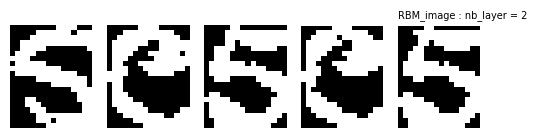

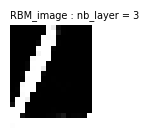

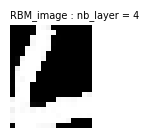

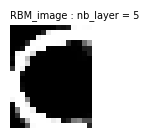

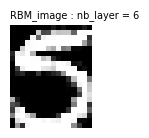

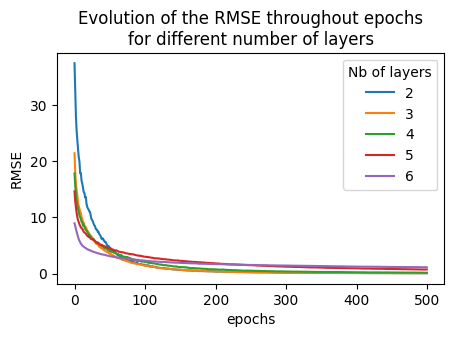

In [8]:
# Test different values of layers

config_list = [[320, 200], [320, 200, 150], [320, 200, 150, 100], [320, 200, 150, 100, 50], [320, 200, 150, 100, 50, 25]]
config_len = [len(config) for config in config_list]
errors_config = []
for config in config_list:
    dbn_model = DBN(config=config)
    dbn_model, errors_all = dbn_model.train_DBN(X=data, epsilon=0.1, batch_size=16, nb_epochs=500)
    errors_config.append(errors_all[-1])
    dbn_model.generate_for_analysis_DBN(nb_gibbs=100, col=5, row=1, param_analysed='config')

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, error_config in enumerate(errors_config):
    plt.plot(error_config, label=config_len[i])
    
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.title('Evolution of the RMSE throughout epochs\nfor different number of layers')
plt.legend(title='Nb of layers')
plt.show()

#### Number of different digits

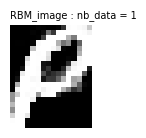

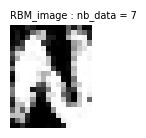

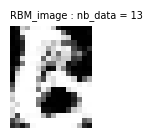

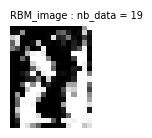

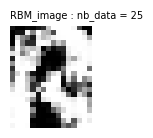

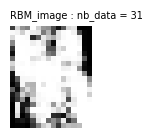

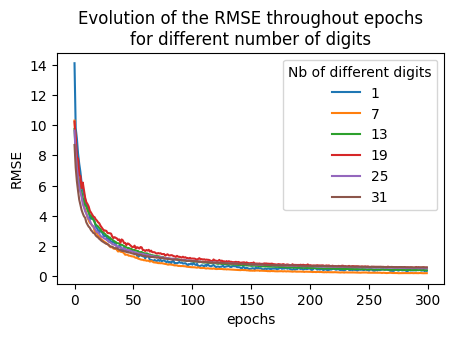

In [9]:
errors_all = []
nb_digits = []
for i in range(1, 36, 6):
    indexes = [
            np.random.randint(0, 36) for _ in range(i)
        ]
    data = alpha_digit(indexes)
    nb_digit = len(indexes)
    nb_digits.append(nb_digit)
    dbn = DBN(config=CONFIG)
    dbn, errors_all_nb_data = dbn.train_DBN(X=data, epsilon=0.5, batch_size=BATCH_SIZE, nb_epochs=300)
    errors_all.append(errors_all_nb_data[-1])
    dbn.generate_for_analysis_DBN(nb_gibbs=10, col=5, row=1, param_analysed='nb_data', nb_digit=nb_digit)

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, error in enumerate(errors_all):
    plt.plot(error, label=nb_digits[i])
    
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.title('Evolution of the RMSE throughout epochs\nfor different number of digits')
plt.legend(title='Nb of different digits')
plt.show()